Part B — training images: 400
Part B — testing images : 316
Count: 234
min: 12 max: 578 mean: 123.2


,count
count,400.000000
mean,123.200000
std,94.007625
min,12.000000
25%,50.750000
50%,99.500000
75%,162.750000
max,578.000000


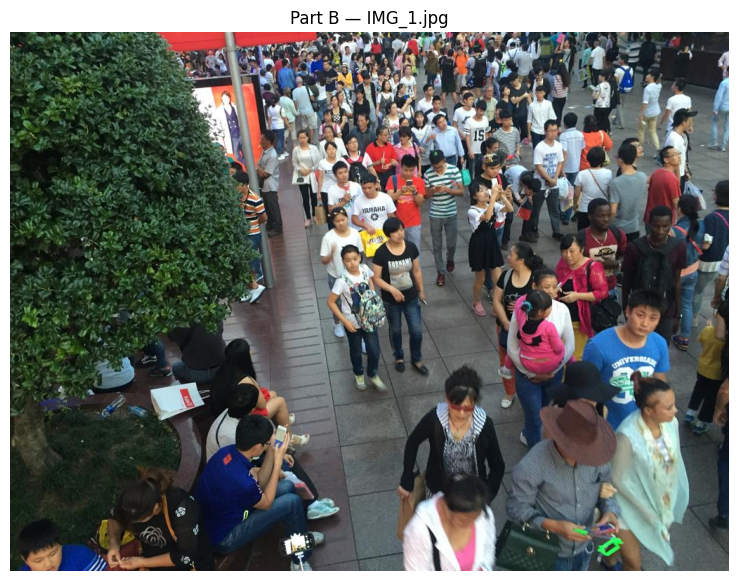

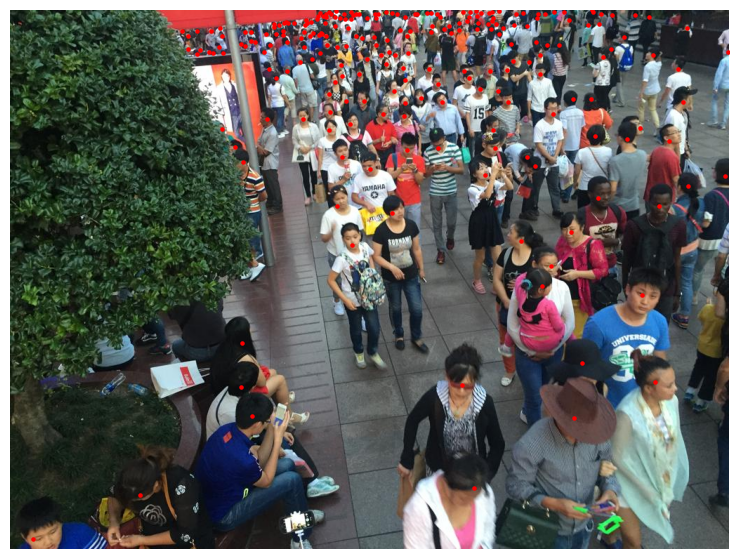

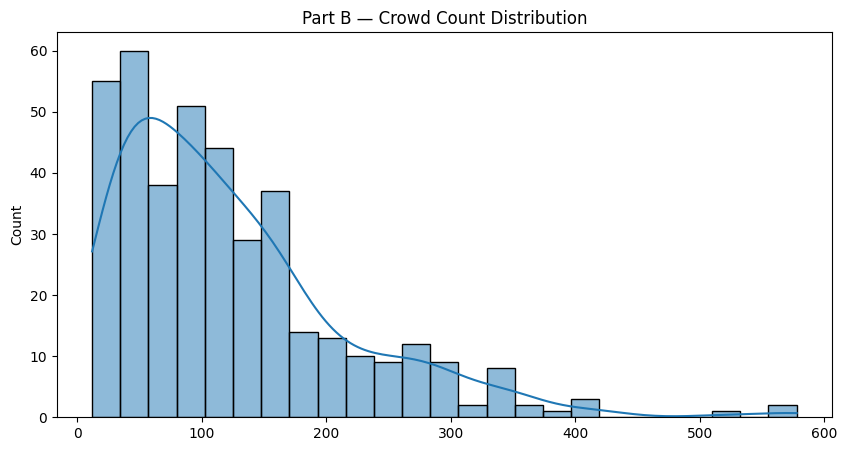

In [8]:


import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import scipy.io as sio
import pandas as pd

## Paths & lists for Part B

train_img_path_B = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_B_final\train_data\images"
train_gt_path_B  = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_B_final\train_data\ground_truth"

test_img_path_B  = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_B_final\test_data\images"
test_gt_path_B   = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_B_final\test_data\ground-truth"

train_images_B = sorted([f for f in os.listdir(train_img_path_B) if f.lower().endswith('.jpg') or f.lower().endswith('.png')])
test_images_B  = sorted([f for f in os.listdir(test_img_path_B) if f.lower().endswith('.jpg') or f.lower().endswith('.png')])

print("Part B — training images:", len(train_images_B))
print("Part B — testing images :", len(test_images_B))

## Show sample image (Part B)
sampleB = train_images_B[0]
imgB = plt.imread(os.path.join(train_img_path_B, sampleB))
plt.figure(figsize=(10,7)); plt.imshow(imgB); plt.title(f"Part B — {sampleB}"); plt.axis('off')

### Show GT points (Part B)
gtB = sio.loadmat(os.path.join(train_gt_path_B, "GT_" + sampleB.replace(".jpg","") + ".mat"))
ptsB = gtB["image_info"][0][0][0][0][0]
plt.figure(figsize=(10,7)); plt.imshow(imgB); plt.scatter(ptsB[:,0], ptsB[:,1], s=5, c='red'); plt.axis('off')
print("Count:", len(ptsB))

## Distribution & sizes (Part B)
counts_B = []
for name in train_images_B:
    mat = sio.loadmat(os.path.join(train_gt_path_B, "GT_" + name.replace(".jpg","") + ".mat"))
    pts = mat["image_info"][0][0][0][0][0]
    counts_B.append(len(pts))

plt.figure(figsize=(10,5)); sns.histplot(counts_B, kde=True, bins=25); plt.title("Part B — Crowd Count Distribution")
print("min:", np.min(counts_B), "max:", np.max(counts_B), "mean:", np.mean(counts_B).round(2))

## Summary table (Part B)
dfB = pd.DataFrame({"image": train_images_B, "count": counts_B})
dfB.describe()
